# Efficient Frontier Project
by: Jean B and Alex G

### Import libraries

In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
print(os.getcwd())

/Users/jcarlito/Documents/GitHub/Quantative-Finance-Repo/Finished_workbooks/EF


### Step 2: Retrieve daily open or close data on your assets for the previous 2 years

In [4]:
tickers = ["NVDA","META", "COKE", "MSFT", "AAPL", "AMD", "GOOG"] 
#"NVDA", "META", "COKE", "MSFT", "AAPL", "AMD", "GOOG", "SBUX", "F", "TSLA", "BP", "EBAY", "AMZN", "ABNB"
etfs = ["SPY", "IWM", "DIA"]
assets = tickers + etfs

# This should be two years
data = yf.download(tickers, period = '10y')['Adj Close']
""" Using 1 year for testing purpose
Using tickers instead of assets because portfolio only includes tickers"""
returns = data.pct_change().dropna()
returns

[*********************100%%**********************]  7 of 7 completed


,AAPL,AMD,COKE,GOOG,META,MSFT,NVDA
Date,,,,,,,
2013-12-20,0.008376,0.010959,0.018182,0.013257,0.001272,0.015172,0.020156
2013-12-23,0.038378,0.016260,0.005260,0.013156,0.048077,-0.004891,0.005736
2013-12-24,-0.004245,0.005333,-0.006059,-0.002923,0.003289,0.012562,0.002535
2013-12-26,-0.006641,0.007958,-0.000277,0.005055,-0.003968,0.009709,-0.009482
2013-12-27,-0.006756,-0.005263,0.011364,0.000841,-0.039667,-0.004007,0.005743
...,...,...,...,...,...,...,...
2023-12-13,0.016691,0.004215,0.017218,0.002469,0.001556,-0.000027,0.009044
2023-12-14,0.000758,-0.001375,0.004980,-0.005748,-0.004690,-0.022545,0.005448
2023-12-15,-0.002726,0.008333,-0.004327,0.004805,0.005253,0.013117,0.011169


### Step 2: Retrieve daily open or close data on your assets for the previous 2 years

In [5]:
data.tail()

,AAPL,AMD,COKE,GOOG,META,MSFT,NVDA
Date,,,,,,,
2023-12-13,197.960007,138.190002,855.460022,133.970001,334.739990,374.369995,480.880005
2023-12-14,198.110001,138.000000,859.719971,133.199997,333.170013,365.929993,483.500000
2023-12-15,197.570007,139.149994,856.000000,133.839996,334.920013,370.730011,488.899994
2023-12-18,195.889999,138.899994,868.739990,137.190002,344.619995,372.649994,500.769989
2023-12-19,196.225006,139.649994,877.580017,137.654999,350.635010,371.579987,491.884613


### Step 3: Calculate the mean, variance, and correlation matrix for all assets

In [6]:
# returns.mean()
# returns.var()

# Mean and Variance
table = pd.DataFrame(index=assets)
table['Mean'] = returns.mean()  # Calculating mean on returns
table['Variance'] = returns.var()  # Calculating variance on returns

table.round(4)  # Displaying the mean and variance table

,Mean,Variance
NVDA,0.0024,0.0009
META,0.0010,0.0006
COKE,0.0013,0.0005
MSFT,0.0011,0.0003
AAPL,0.0011,0.0003
AMD,0.0021,0.0013
GOOG,0.0008,0.0003
SPY,NaN,NaN
IWM,NaN,NaN
DIA,NaN,NaN


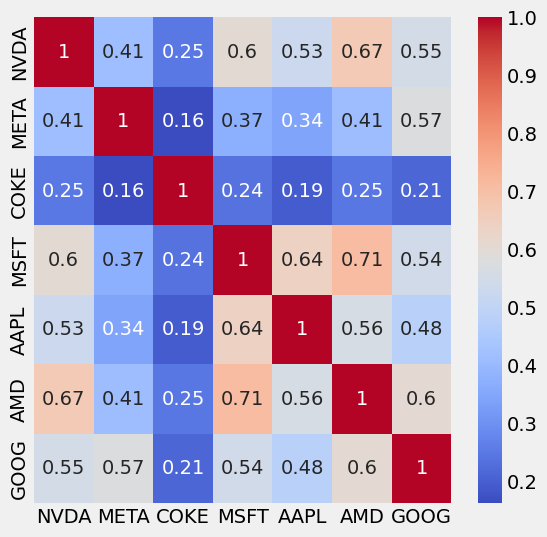

In [19]:
# Correlation matrix
plt.figure(figsize=(6, 6))
sn.heatmap(returns.corr(), annot=True, cmap="coolwarm")

#plt.savefig('resources/correlation-matrix.png', dpi=400)

## Source
Monte Carlo Simulation 

https://www.youtube.com/watch?v=wlaLmM_LvWg&ab_channel=SpencerPao

In [7]:
# where dataframe = yf.Download(basket of stocks, period = '10y')
class EfficientFrontier:
    def __init__(self, dataframe):
        self.df = dataframe
        self.basket = self.df.columns
        self.num_assets = len(self.basket)
        self.num_portfolios = 200000
        self.portfolio_returns = []
        self.portfolio_volatility = []
        self.sharpe_ratio = []
        self.stock_weights = []
        self.sharpe_portfolio = None
        self.min_variance_port = None

    def calculate_portfolio(self):
        expected_returns_a = self.df.pct_change()
        expected_returns_a.columns = self.df.columns
        expected_returns_aA = pd.DataFrame(expected_returns_a.mean()*250)
        expected_returns_aA = expected_returns_aA.T
        dar = self.df.pct_change().iloc[1:,:]+1
        gar = pd.DataFrame(np.prod(dar)**(1/float(6)) - 1)
        full_return_annual = (pd.concat([expected_returns_aA.T, gar], axis = 1))
        self.annual_returns = (expected_returns_a.mean() * 250) + 1  
        self.cov_daily = expected_returns_a.cov()  
        self.cov_annual = self.cov_daily * 250
        self.annual_returns.columns = ["Annual Returns:"]
        print(self.annual_returns)

    def plot_frontier(self):
        np.random.seed(3)
        for i in range(self.num_portfolios):
            weights = np.random.random(self.num_assets)
            weights /= np.sum(weights)
            returns = (np.dot(weights, (self.annual_returns)))
            volatility = np.sqrt(np.dot(weights.T, np.dot(self.cov_annual, weights)))
            sharpe = ((returns-1) / volatility)
            self.sharpe_ratio.append(sharpe)
            self.portfolio_returns.append(returns-1)
            self.portfolio_volatility.append(volatility)
            self.stock_weights.append(weights)

        portfolio = {'Returns': self.portfolio_returns,
                    'Volatility': self.portfolio_volatility,
                 'Sharpe Ratio': self.sharpe_ratio}

        for counter, symbol in enumerate(self.basket):
         portfolio[symbol+' Weight'] = [Weight[counter] for Weight in self.stock_weights]

        simulations = pd.DataFrame(portfolio)
        min_volatility = simulations['Volatility'].min()
        max_sharpe = simulations['Sharpe Ratio'].max()

        self.sharpe_portfolio = simulations.loc[simulations['Sharpe Ratio'] == max_sharpe]
        self.min_variance_port = simulations.loc[simulations['Volatility'] == min_volatility]

        plt.style.use('fivethirtyeight')
        simulations.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
              cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
        plt.scatter(x=self.sharpe_portfolio['Volatility'], y=self.sharpe_portfolio['Returns'], c='red', marker='D', s=200)
        plt.scatter(x=self.min_variance_port['Volatility'], y=self.min_variance_port['Returns'], c='blue', marker='D', s=200 )
        plt.xlabel('Volatility (Std. Deviation)')
        plt.ylabel('Expected Returns')
        plt.title('Efficient Frontier')
        plt.show()

    def get_optimal_portfolio(self):
        r_ef = pd.concat([self.min_variance_port.T,self.sharpe_portfolio.T], axis = 1)
        r_ef.columns = ["Minimum Risk Adjusted Values", "Max Risk Adjusted Values"]
        print(r_ef)

In [8]:
ef = EfficientFrontier(data)
ef.calculate_portfolio() #Printing Annual Returns


AAPL    1.282924
AMD     1.525935
COKE    1.323897
GOOG    1.200312
META    1.254572
MSFT    1.284764
NVDA    1.593743
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


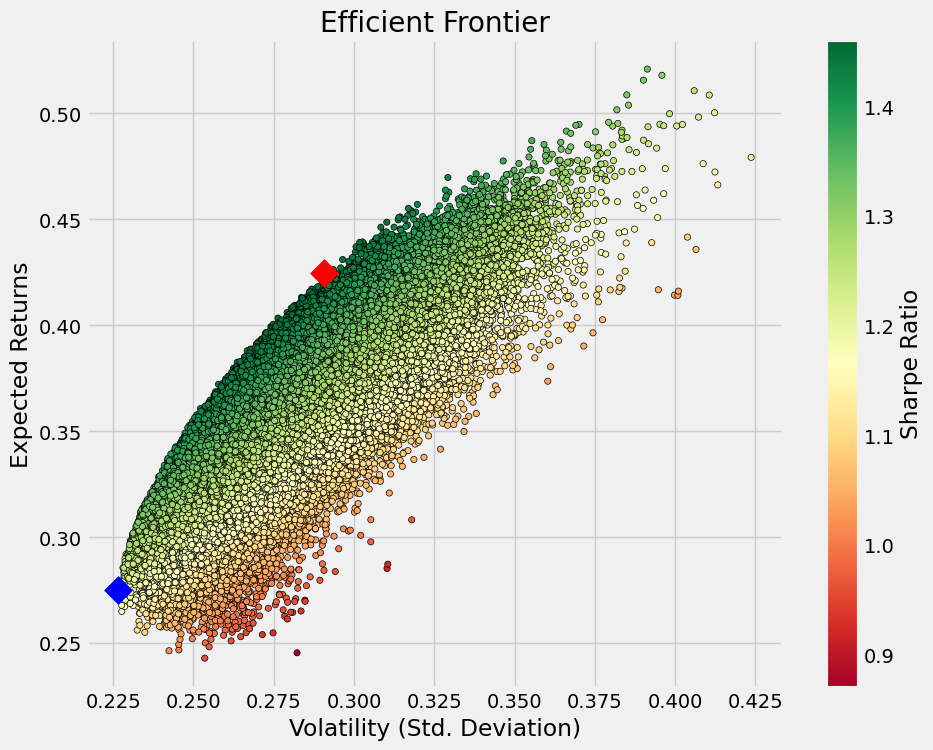

In [9]:
ef.plot_frontier()

In [10]:
ef.get_optimal_portfolio()

              Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                           0.275260                  0.424702
Volatility                        0.226633                  0.290683
Sharpe Ratio                      1.214564                  1.461047
AAPL Weight                       0.227224                  0.077772
AMD Weight                        0.010753                  0.039759
COKE Weight                       0.210380                  0.280796
GOOG Weight                       0.243476                  0.000370
META Weight                       0.001436                  0.017625
MSFT Weight                       0.304485                  0.195085
NVDA Weight                       0.002245                  0.388593
